# Problem Statement:
---
Here we want to classify traffic signs as an important task for building self driving cars. We have 43 classes that we want to classify, and here is a high level view of the project:

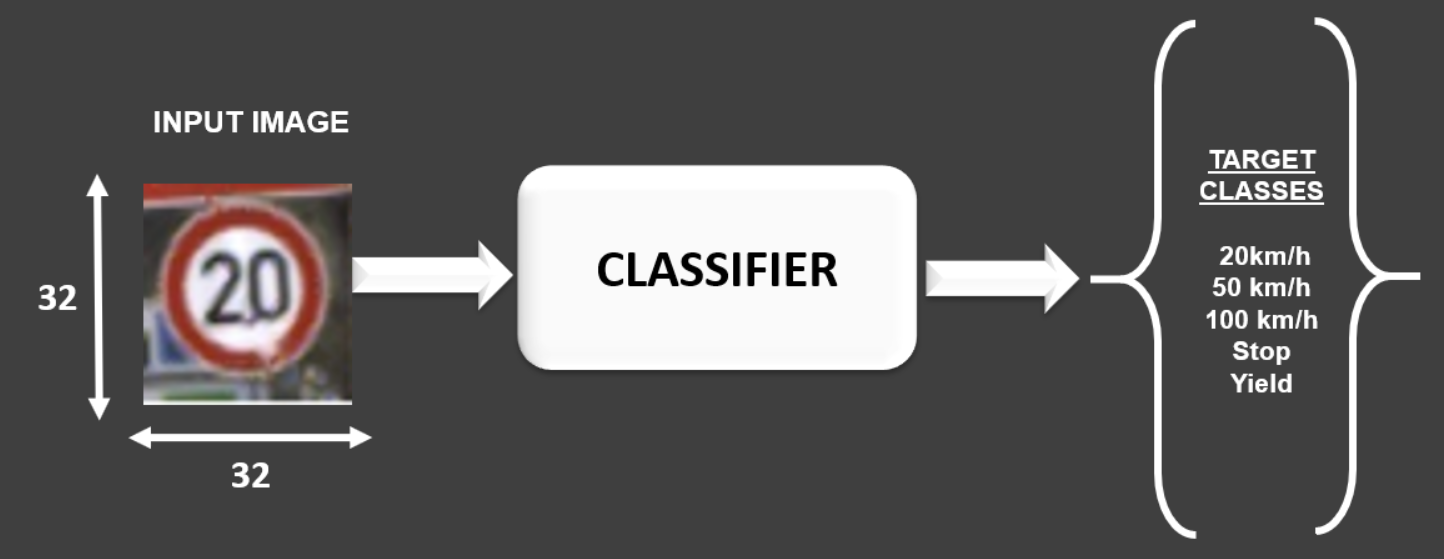

# Import Libraries/Datasets:
---

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [2]:
with open('../Datasets/traffic-signs/train.p', mode='rb') as training_data:
    train = pickle.load(training_data)
with open("../Datasets/traffic-signs/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("../Datasets/traffic-signs/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
x_train, y_train = train['features'], train['labels']

In [4]:
x_valid, y_valid = valid['features'], valid['labels']

In [5]:
x_test, y_test = test['features'], test['labels']

# Examining The Data:
---

In [6]:
print(f'x_train shape: {x_train.shape}')
print(f'x_valid shape: {x_valid.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_valid shape: {y_valid.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (34799, 32, 32, 3)
x_valid shape: (4410, 32, 32, 3)
x_test shape: (12630, 32, 32, 3)
y_train shape: (34799,)
y_valid shape: (4410,)
y_test shape: (12630,)


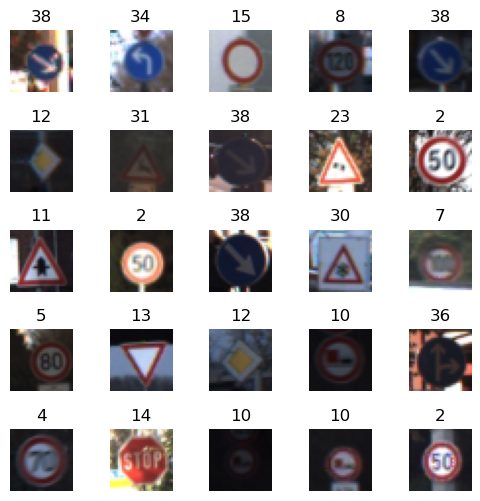

In [7]:
m = x_train.shape[0]

fig, ax = plt.subplots(5,5,figsize=(5,5))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(ax.flat):
    rand = np.random.randint(m)
    
    ax.imshow(x_train[rand].reshape(32,32,3))
    ax.set_title(y_train[rand])
    ax.set_axis_off()

# Building The Model:
---

In [8]:
model = tf.keras.models.Sequential([
                             tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(32,32,3)),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Conv2D(32,3, activation='relu'),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Conv2D(64,3, activation='relu'),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(1024, 'relu'),
                             tf.keras.layers.Dense(43, 'softmax')
                             ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [9]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics='acc')

# Training The Model:
---

In [10]:
history = model.fit(x_train,
          y_train,
          epochs=50,
          validation_data = (x_valid, y_valid))

Epoch 1/50
1088/1088 [==============================] - 33s 30ms/step - loss: 1.2894 - acc: 0.6778 - val_loss: 0.7421 - val_acc: 0.8141
Epoch 2/50
1088/1088 [==============================] - 36s 33ms/step - loss: 0.3337 - acc: 0.9089 - val_loss: 0.4071 - val_acc: 0.9054
Epoch 3/50
1088/1088 [==============================] - 36s 33ms/step - loss: 0.2223 - acc: 0.9394 - val_loss: 0.3860 - val_acc: 0.9052
Epoch 4/50
1088/1088 [==============================] - 38s 35ms/step - loss: 0.1902 - acc: 0.9488 - val_loss: 0.3621 - val_acc: 0.9279
Epoch 5/50
1088/1088 [==============================] - 39s 36ms/step - loss: 0.1541 - acc: 0.9595 - val_loss: 0.3762 - val_acc: 0.9179
Epoch 6/50
1088/1088 [==============================] - 43s 40ms/step - loss: 0.1613 - acc: 0.9577 - val_loss: 0.2774 - val_acc: 0.9374
Epoch 7/50
1088/1088 [==============================] - 41s 38ms/step - loss: 0.1380 - acc: 0.9658 - val_loss: 0.4690 - val_acc: 0.9170
Epoch 8/50
1088/1088 [==========================

# Visualizing The Performance:
---

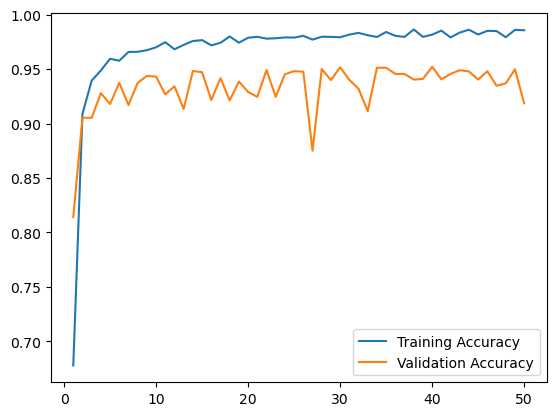

In [11]:
acc = history.history['acc']
valid_acc = history.history['val_acc']
plt.plot(range(1,51), acc, label='Training Accuracy')
plt.plot(range(1,51), valid_acc, label='Validation Accuracy')
plt.legend()

# Evaluating How The Model Generalizes To Unseen Data:
---

In [12]:
model.evaluate(x_test, y_test)

395/395 [==============================] - 3s 7ms/step - loss: 2.0883 - acc: 0.8997


[2.0882606506347656, 0.8996832966804504]

In [13]:
prediction = model.predict(x_test)

395/395 [==============================] - 2s 5ms/step


In [18]:
prediction[2].argmax()

38

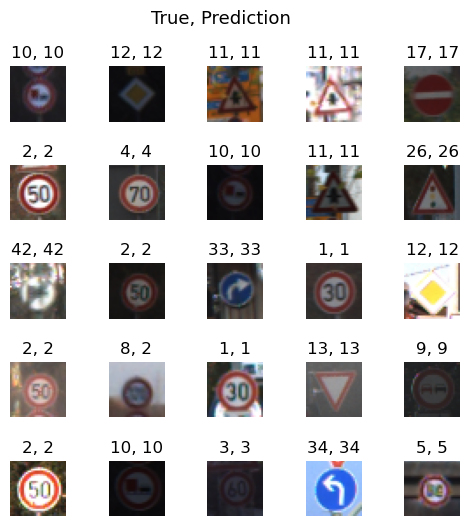

In [38]:
m = x_test.shape[0]

fig, ax = plt.subplots(5,5,figsize=(5,5))
fig.tight_layout(pad=0.5)

for i, ax in enumerate(ax.flat):
    rand = np.random.randint(m)
    
    ax.imshow(x_test[rand].reshape(32,32,3))
    ax.set_title(f'{y_test[rand]}, {prediction[rand].argmax()}')
    ax.set_axis_off()
fig.suptitle('True, Prediction\n\n\n\n', fontsize=13, va='center');